## Decision_Tree

In [22]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [23]:
# 2. Load the pre-split dataset

# Read the training and testing datasets from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [24]:
# Print the columns of the dataframe
print(X_train.columns.tolist())

['Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Partner', 'Tenure', 'Monthly Charges', 'Country_United States', 'State_California', 'Quarter_Q3', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'P


Remaining features after cleaning: ['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Partner', 'Tenure', 'Monthly Charges', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'Payment Method_Bank Withdrawal', 

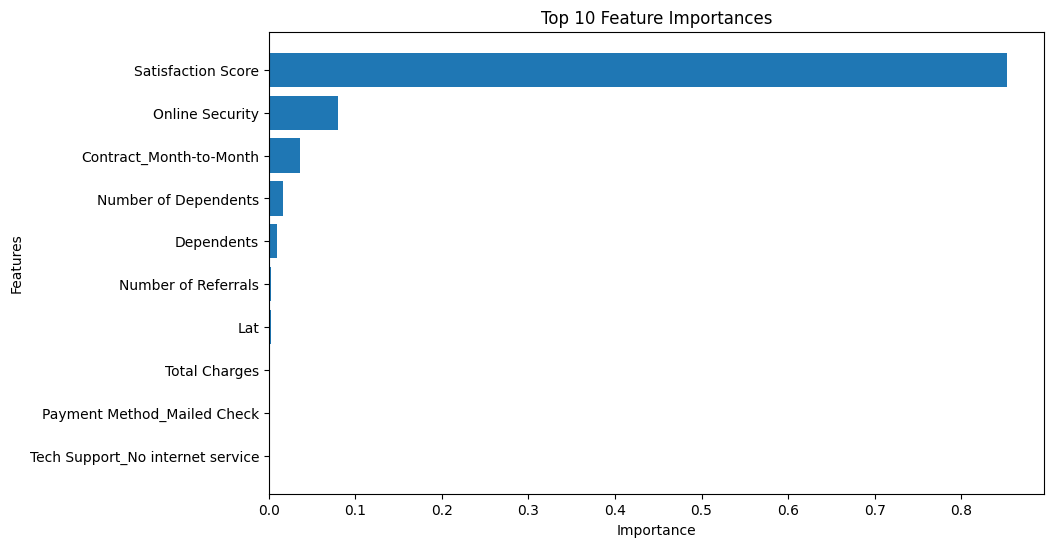

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def clean_features(X):
    
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    low_variance_features = [
        col for col in numeric_cols if X[col].var() < 0.01
    ]
    X = X.drop(columns=low_variance_features)
    
    return X, low_variance_features

def evaluate_decision_tree(X, y):
 
    X_cleaned, dropped_features = clean_features(X)
    print(f"\nRemaining features after cleaning: {X_cleaned.columns.tolist()}")
    
    X_processed = pd.get_dummies(X_cleaned, drop_first=True)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=0.2, stratify=y, random_state=42
    )
    
    
    param_grid = {
        'max_depth': [3, 4, 5],
        'min_samples_split': [10, 20],
        'min_samples_leaf': [10, 20],
        'criterion': ['gini', 'entropy'],
        'class_weight': ['balanced']
    }
    
  
    dt = DecisionTreeClassifier(random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
   
    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    print("\nBest Parameters:", grid_search.best_params_)
    print(f"Best Cross-validation Score: {grid_search.best_score_:.4f}")
    
    y_pred_test = best_model.predict(X_test)
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test),
        'recall': recall_score(y_test, y_pred_test),
        'f1': f1_score(y_test, y_pred_test)
    }
    print("\nTest Set Performance:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.4f}")
    
    feature_importance = best_model.feature_importances_
    importance_df = pd.DataFrame({
        'feature': X_processed.columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10))
    
    print("\nDropped features during cleaning:", dropped_features)
    
    return best_model, importance_df, test_scores

def plot_feature_importance(importance_df):
    """plot"""
    top_features = importance_df.head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['feature'], top_features['importance'], align='center')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Top 10 Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()


best_model, feature_importance, test_scores = evaluate_decision_tree(X_train, y_train)

# Save the evaluation metrics for the best model
evaluation_metrics = {
    "accuracy": test_scores['accuracy'],
    "precision": test_scores['precision'],
    "recall": test_scores['recall'],
    "f1": test_scores['f1']
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv('../2_data/evaluation_metrics/DecisionTree.csv', index=False)

plot_feature_importance(feature_importance)
